Střední hodnota bez roušky 138.16161616161617
Rozptyl bez roušky 0.6203448627691053
Střední hodnota s rouškou 137.62626262626262
Rozptyl s rouškou 0.4966840118355269


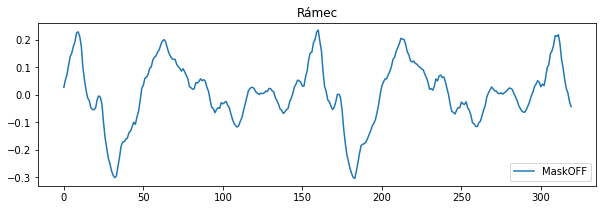

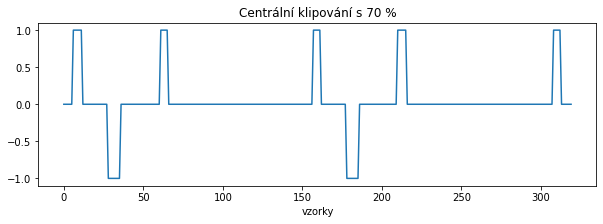

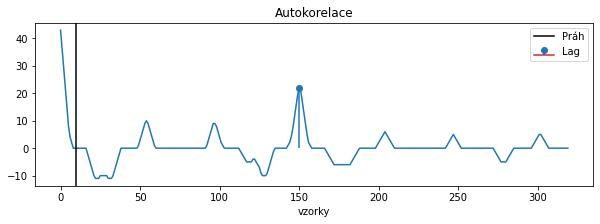

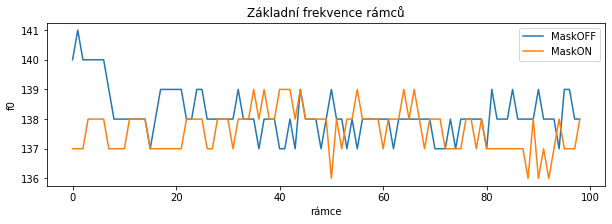

In [11]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
import copy
data,fs=sf.read('off.wav')
data-=np.mean(data)
data2,fs=sf.read('on.wav')
data2-=np.mean(data2)
counter=0
x=[]
x2=[]
for i in range(0,99):
    y=[]
    y2=[]
    for j in range(0,320):
        y.append(data[j+160*counter])
        y2.append(data2[j+160*counter])
    x.append(y)
    x2.append(y2)
    counter=counter+1

plt.figure(figsize=(10,3))
plt.title("Rámec")
plt.plot(x[0],label='MaskOFF')
plt.legend()


for i in range(0,99):
    min70=min(x[i])*0.7
    max70=max(x[i])*0.7
    for j in range(0,320):
        if x[i][j]>max70:
            x[i][j]=1
        elif x[i][j]<min70: 
             x[i][j]=-1
        else:
            x[i][j]=0
            
for i in range(0,99):
    min70=min(x2[i])*0.7
    max70=max(x2[i])*0.7
    for j in range(0,320):
        if x2[i][j]>max70:
            x2[i][j]=1
        elif x2[i][j]<min70: 
             x2[i][j]=-1
        else:
            x2[i][j]=0          
                     
plt.figure(figsize=(10,3))
plt.plot(x[0])
plt.title("Centrální klipování s 70 %")
plt.xlabel("vzorky")
#plt.plot(x2[0],label='MaskON')




array=x[:]
array2=x2[:]
prah=10
autocorr=[]
autocorr2=[]
vsechnyramce=[]
vsechnyramce2=[]
suma=0
suma2=0
lag=[]
lag2=[]
lag_2=[]
lag2_2=[]
#sum s(n)s(n+m), n=0 N-1-m
for c in range(0,99): #pro všechny rámce
    for i in range(0,320): #cely ramec
        for j in range(0,320-i): #zkraceny ramec (posunut na zacatku i na konci o i)
            suma=suma+(array[c][j]*array[c][i+j])
            suma2=suma2+(array2[c][j]*array2[c][j+i])
        autocorr.append(suma)
        autocorr2.append(suma2)
        suma=0
        suma2=0
    vsechnyramce.append(autocorr)
    lag.append(np.argmax(autocorr[prah:]))
    lag2.append(np.max(autocorr[prah:]))
    autocorr=[]
    
    vsechnyramce2.append(autocorr2)
    lag_2.append(np.argmax(autocorr2[prah:]))
    lag2_2.append(np.max(autocorr2[prah:]))
    autocorr2=[]

plt.figure(figsize=(10,3))
plt.title("Autokorelace")
plt.plot(vsechnyramce[0])
plt.stem([lag[0]+prah],[lag2[0]],label='Lag')
plt.xlabel('vzorky')
plt.axvline(prah,color='k',label='Práh')
plt.legend()    

plt.figure(figsize=(10,3))
plt.title("Základní frekvence rámců")
plt.plot(lag,label='MaskOFF') 
plt.plot(lag_2,label='MaskON')
plt.xlabel('rámce')
plt.ylabel('f0')
plt.legend()



#TODO men z tyhle frekvence
print("Střední hodnota bez roušky",np.mean(lag))
print("Rozptyl bez roušky",np.var(lag))
print("Střední hodnota s rouškou",np.mean(lag_2))
print("Rozptyl s rouškou",np.var(lag_2))

Střední hodnota bez roušky 138.16161616161617
Rozptyl bez roušky 0.6203448627691053
Střední hodnota s rouškou 137.62626262626262
Rozptyl s rouškou 0.4966840118355269


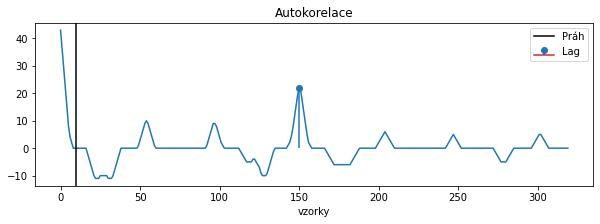

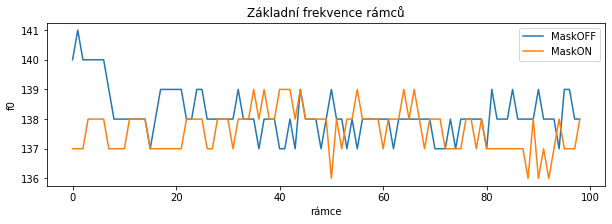

In [8]:

array=x[:]
array2=x2[:]
prah=10
autocorr=[]
autocorr2=[]
vsechnyramce=[]
vsechnyramce2=[]
suma=0
suma2=0
lag=[]
lag2=[]
lag_2=[]
lag2_2=[]
#sum s(n)s(n+m), n=0 N-1-m
for c in range(0,99):
    for i in range(0,320):
        for j in range(0,320-i):
            suma=suma+(array[c][j]*array[c][i+j])
            suma2=suma2+(array2[c][j]*array2[c][j+i])
        autocorr.append(suma)
        autocorr2.append(suma2)
        suma=0
        suma2=0
    vsechnyramce.append(autocorr)
    lag.append(np.argmax(autocorr[prah:]))
    lag2.append(np.max(autocorr[prah:]))
    autocorr=[]
    
    vsechnyramce2.append(autocorr2)
    lag_2.append(np.argmax(autocorr2[prah:]))
    lag2_2.append(np.max(autocorr2[prah:]))
    autocorr2=[]

plt.figure(figsize=(10,3))
plt.title("Autokorelace")
plt.plot(vsechnyramce[0])
plt.stem([lag[0]+prah],[lag2[0]],label='Lag')
plt.xlabel('vzorky')
plt.axvline(prah,color='k',label='Práh')
plt.legend()    

plt.figure(figsize=(10,3))
plt.title("Základní frekvence rámců")
plt.plot(lag,label='MaskOFF') 
plt.plot(lag_2,label='MaskON')
plt.xlabel('rámce')
plt.ylabel('f0')
plt.legend()




print("Střední hodnota bez roušky",np.mean(lag))
print("Rozptyl bez roušky",np.var(lag))
print("Střední hodnota s rouškou",np.mean(lag_2))
print("Rozptyl s rouškou",np.var(lag_2))

